In [1]:
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
matplotlib.style.use('seaborn-v0_8-deep')

In [2]:
generation = pd.read_csv("../Project_data/Normalized Data/sunnyvale_generation_hourly_2018.csv", index_col=0, parse_dates=True)
weather = pd.read_csv("../Project_data/Normalized Data/noaa_sunnyvale_weather_hourly_2018.csv", index_col=0, parse_dates=True)
use_load = pd.read_csv("../Project_data/Normalized Data/sunnyvale_bid_367272_load_hourly_2018.csv", index_col=0, parse_dates=True)

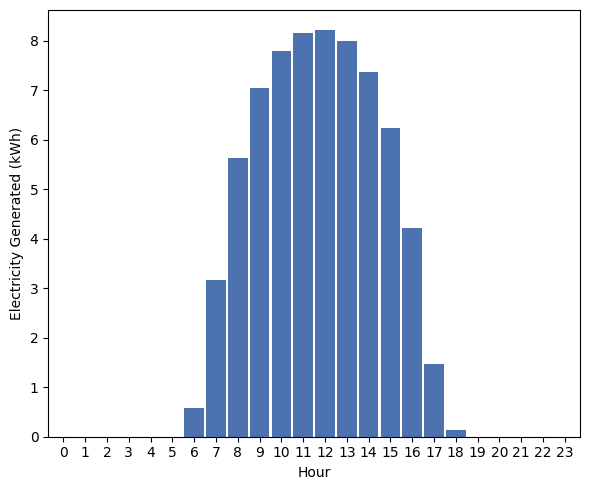

In [17]:
df = pd.read_csv("../Project_data/Predictor Data/generation.csv", index_col=0, parse_dates=True)
plt.figure(figsize=(6,5))
july1 = df.loc['2018-07-01']['1998-2022 Mean Clear Sky Generation (kWh)']
july1.index = july1.index.hour
ax = july1.plot(kind='bar', rot=0, width=0.9)
plt.ylabel("Electricity Generated (kWh)")
plt.xlabel("Hour")
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax.axvline(11.5, color='silver', linestyle='dashed')
plt.tight_layout()
plt.savefig("../figures/typical_generation_day.pdf")

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='DATE')

In [84]:
use_load.sum()

out.electricity.total.energy_consumption    16481.152
dtype: float64

In [85]:
generation

,1998-2022 Mean Clear Sky Generation (kWh),2018 Actual Meteorological Year Generation (kWh)
Time stamp,,
2018-01-01 00:00:00,0.0,0.0
2018-01-01 01:00:00,0.0,0.0
2018-01-01 02:00:00,0.0,0.0
2018-01-01 03:00:00,0.0,0.0
2018-01-01 04:00:00,0.0,0.0
...,...,...
2018-12-31 19:00:00,0.0,0.0
2018-12-31 20:00:00,0.0,0.0
2018-12-31 21:00:00,0.0,0.0


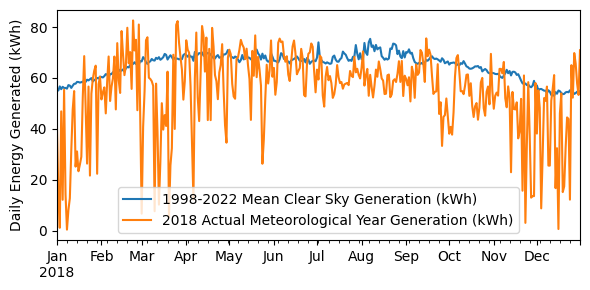

In [24]:
matplotlib.style.use('default')
generation.resample(rule="D").sum()[['1998-2022 Mean Clear Sky Generation (kWh)', '2018 Actual Meteorological Year Generation (kWh)']].plot(figsize=(6,3))
plt.xlabel(None)
plt.ylabel("Daily Energy Generated (kWh)")
plt.tight_layout()
plt.savefig("../figures/2018AMY_vs_mean_clearsky_generation.pdf")

In [65]:
generation['2018 Actual Meteorological Year Generation (kWh)'].sum()

19853.132867469998

In [66]:
df = generation.merge(weather, left_index=True, right_index=True)

In [67]:
df.corr()

,1998-2022 Mean Clear Sky Generation (kWh),2018 Actual Meteorological Year Generation (kWh),cloudCover,pressureMeanSeaLevel,temperature,temperatureDewPoint,visibility,windDirection,windSpeed
1998-2022 Mean Clear Sky Generation (kWh),1.000000,0.919643,0.229625,-0.000352,-0.458258,-0.049469,-0.000760,-0.268772,-0.455841
2018 Actual Meteorological Year Generation (kWh),0.919643,1.000000,0.185297,0.007380,-0.425851,-0.074685,0.040575,-0.237678,-0.423716
cloudCover,0.229625,0.185297,1.000000,-0.037207,-0.145969,0.152494,-0.116105,-0.168661,-0.105102
pressureMeanSeaLevel,-0.000352,0.007380,-0.037207,1.000000,-0.460384,-0.477242,-0.105909,-0.016737,-0.248201
temperature,-0.458258,-0.425851,-0.145969,-0.460384,1.000000,0.511126,0.187459,0.269848,0.535396
temperatureDewPoint,-0.049469,-0.074685,0.152494,-0.477242,0.511126,1.000000,0.143387,0.046835,0.188044
visibility,-0.000760,0.040575,-0.116105,-0.105909,0.187459,0.143387,1.000000,0.054555,0.175012
windDirection,-0.268772,-0.237678,-0.168661,-0.016737,0.269848,0.046835,0.054555,1.000000,0.277007
windSpeed,-0.455841,-0.423716,-0.105102,-0.248201,0.535396,0.188044,0.175012,0.277007,1.000000


## Use Load

In [46]:
df = use_load.copy()
og_df = use_load.copy()
# Add Date Information
df['month'] =                   pd.to_numeric(og_df.index.strftime('%-m'))
df['day'] =                     pd.to_numeric(og_df.index.strftime("%-d"))
df['day_of_week'] =             pd.to_numeric(og_df.index.strftime("%w"))
df['day_of_year'] =             og_df.index.dayofyear
df['hour'] =                    pd.to_numeric(og_df.index.strftime("%-H"))

# Add Weekend/Weekday flag
df.loc[df['day_of_week'] < 5, "Weekday"] = 1
df.loc[df['day_of_week'] < 5, "Weekend"] = 0
df.loc[df['day_of_week'] >= 5, "Weekday"] = 0
df.loc[df['day_of_week'] >= 5, "Weekend"] = 1

# Add load from previous 2 hours, previous day, and previous week
# df['previous_hour_load'] = og_df['out.electricity.total.energy_consumption'].shift(periods=1, freq="h")
# df['previous_2hour_load'] = og_df['out.electricity.total.energy_consumption'].shift(periods=2, freq="h")
df['last_week_load'] = og_df['out.electricity.total.energy_consumption'].shift(periods=7, freq="D")
# df['yesterday_load'] = og_df['out.electricity.total.energy_consumption'].shift(periods=1, freq="D")
# Add load from previous Weekend/Weekday
df.loc[df["Weekday"] == 1, "previous_category_day_load"] = df.loc[df["Weekday"] == 1, "out.electricity.total.energy_consumption"].shift(24)
df.loc[df["Weekend"] == 1, "previous_category_day_load"] = df.loc[df["Weekend"] == 1, "out.electricity.total.energy_consumption"].shift(24)
# Trim off the first week (don't have data for previous week)
df = df.iloc[24*7:]

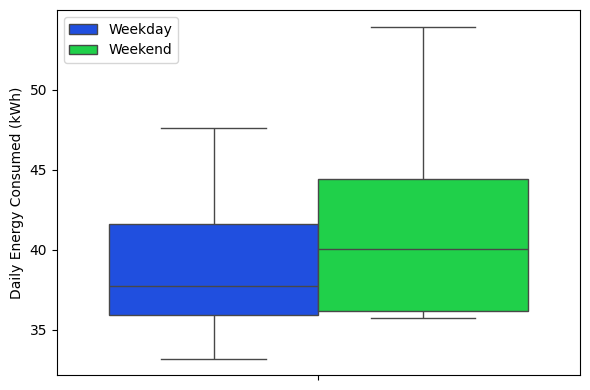

In [47]:
matplotlib.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(6,4))
summer_day = df[df['month'] == 7].groupby("day").sum()
summer_day['Weekday'] = summer_day['Weekday'].map({0: "Weekend", 24: "Weekday"})
sns.boxplot(summer_day, y="out.electricity.total.energy_consumption", hue="Weekday").legend()
plt.ylabel("Daily Energy Consumed (kWh)")
plt.tight_layout()
plt.savefig("../figures/weekend_weekday_average_load.pdf")

<Axes: >

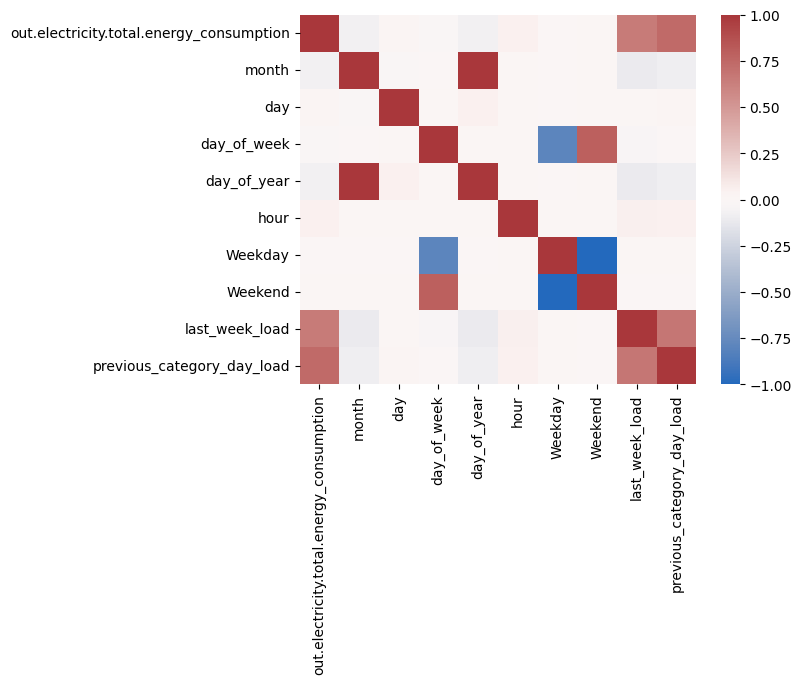

In [74]:
sns.heatmap(df.corr(), cmap=sns.color_palette("vlag", as_cmap=True))

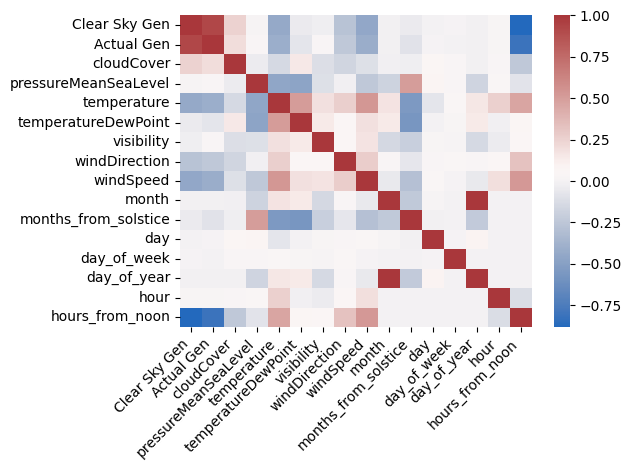

In [36]:
df = generation.merge(weather.shift(-1), left_index=True, right_index=True)
# df['temp_from_17'] = abs(df['temperature'] - 17)
# Add Date Information
df['month'] =                   pd.to_numeric(og_df.index.strftime('%-m'))
df['months_from_solstice'] =    abs(7 - df['month'])
df['day'] =                     pd.to_numeric(og_df.index.strftime("%-d"))
df['day_of_week'] =             pd.to_numeric(og_df.index.strftime("%w"))
df['day_of_year'] =             og_df.index.dayofyear
df['hour'] =                    pd.to_numeric(og_df.index.strftime("%-H"))
df['hours_from_noon'] = abs(df['hour'] - 12)
df.corr()
df.columns = [i.replace("1998-2022 Mean Clear Sky Generation (kWh)", "Clear Sky Gen").replace("2018 Actual Meteorological Year Generation (kWh)", "Actual Gen") for i in df.columns]
sns.heatmap(df.corr(), cmap=sns.color_palette("vlag", as_cmap=True))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../figures/generation_correlation_heatmap.pdf")

In [105]:
non_zero_gen = df[(df['2018 Actual Meteorological Year Generation (kWh)'] > 0) & (df['1998-2022 Mean Clear Sky Generation (kWh)'] > 0)].copy()

In [106]:
non_zero_gen['percent_of_typical'] = non_zero_gen['2018 Actual Meteorological Year Generation (kWh)'] / non_zero_gen['1998-2022 Mean Clear Sky Generation (kWh)']

<Axes: >

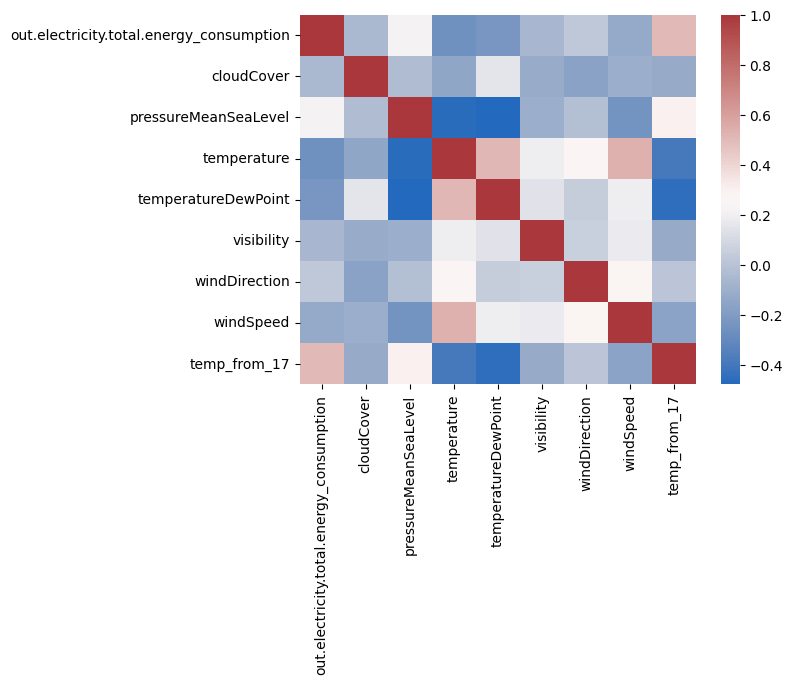

In [38]:
df = use_load.merge(weather, left_index=True, right_index=True)
df['temp_from_17'] = abs(df['temperature'] - 17)
sns.heatmap(df.corr(), cmap=sns.color_palette("vlag", as_cmap=True))

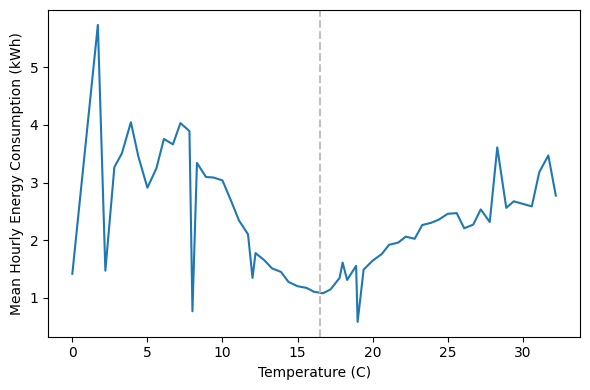

In [44]:
matplotlib.style.use('default')
plt.figure(figsize=(6,4))
df.groupby('temperature').mean()
ax = sns.lineplot(df.groupby('temperature').mean(), x='temperature', y='out.electricity.total.energy_consumption')
plt.xlabel("Temperature (C)")
plt.ylabel("Mean Hourly Energy Consumption (kWh)")
ax.axvline(16.5, color='silver', linestyle='dashed')
plt.tight_layout()
plt.savefig("../figures/load_vs_temperature.pdf")

# Example Data for Timeline Comparison

In [ ]:
month = 7
month_load = use_load[use_load['month'] == month].copy()
month_gen = generation[generation['month'] == month].copy()
rate_plan, system_state = get_rate_and_state("../Project_data/Energy_Rates/nem2.json", month_load)
month_pred_load = pred_load[pred_load.index.month == month].copy()
month_pred_gen = pred_gen[pred_gen.index.month == month].copy()

storage_system['battery_capacity_kwh'] = 0
no_batt_df = optimizer.monthly_set_and_optimize(use_load, generation, rate_plan, system_state, storage_system, month)[0]
storage_system['battery_capacity_kwh'] = 27
with_batt_df = optimizer.monthly_set_and_optimize(use_load, generation, rate_plan, system_state, storage_system, month)[0]

In [ ]:
no_batt_df['net_grid'] = no_batt_df['export_energy'] - no_batt_df['import_energy']
with_batt_df['net_grid'] = with_batt_df['export_energy'] - with_batt_df['import_energy']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def plot_day(df, day):
    day = df[df.index.day == day]
    sns.lineplot(day[['out.electricity.total.energy_consumption', '2018 Actual Meteorological Year Generation (kWh)', 'net_grid']])
    plt.figure()
    sns.barplot(day['ending_soc'])
    return day[['out.electricity.total.energy_consumption', '2018 Actual Meteorological Year Generation (kWh)', 'net_grid', 'ending_soc']]
    

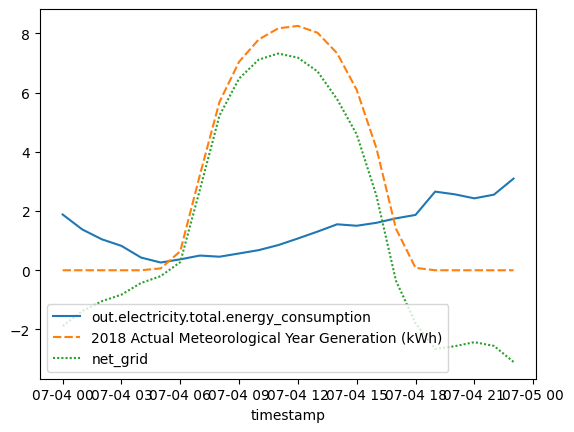

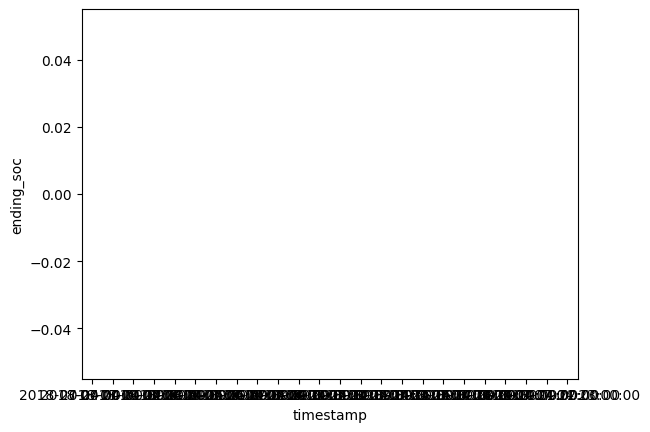

In [ ]:
plot_day(no_batt_df, 4).to_csv("/tmp/nem2_day_without_battery.csv")

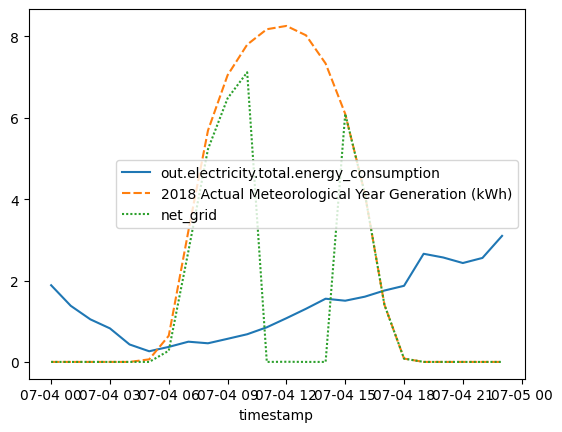

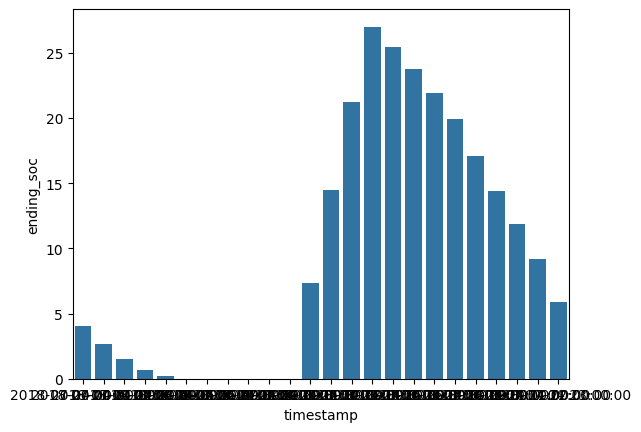

In [ ]:
plot_day(with_batt_df, 4).to_csv("/tmp/nem2_day_with_battery.csv")

# Other Timeline views

In [78]:
use_load = pd.read_csv("../Project_data/Test Data/load_jan.csv", index_col=0, parse_dates=True)
generation = pd.read_csv("../Project_data/Test Data/generation_jan.csv", index_col=0, parse_dates=True)

In [77]:
df = use_load.merge(generation, left_index=True, right_index=True)

In [ ]:
df['Net Energy'] = df['2018 Actual Meteorological Year Generation (kW)'] - df['out.electricity.total.energy_consumption']
df['out.electricity.total.energy_consumption'] = -df['out.electricity.total.energy_consumption']

<Axes: xlabel='timestamp'>

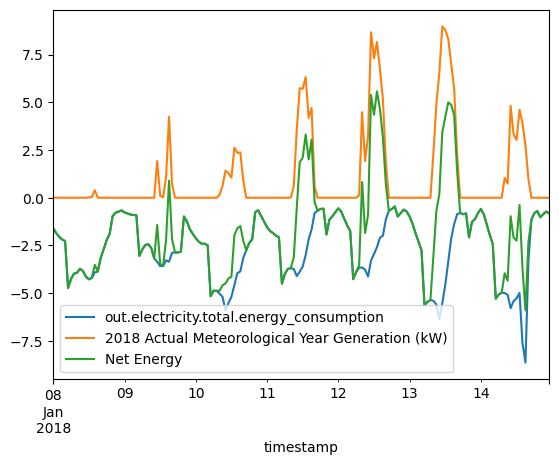

In [ ]:
df.loc['2018-01-08':'2018-01-14'].plot()

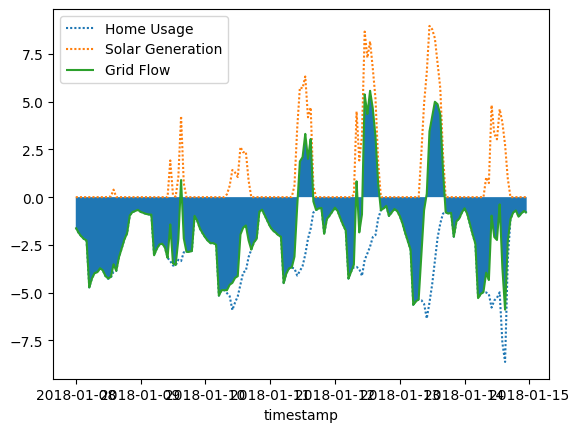

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.lineplot(df.loc['2018-01-08':'2018-01-14'], dashes=[(1, 1), (1, 1), (1,0)])
sns.move_legend(ax, 'best', labels=['Home Usage', 'Solar Generation', 'Grid Flow'])
plt.fill_between(df.loc['2018-01-08':'2018-01-14'].index, df.loc['2018-01-08':'2018-01-14']['Net Energy'])

In [ ]:
merged = generation.join(weather, how='outer')

In [ ]:
merged['hours_from_noon'] = abs(merged['hour'] - 12)

In [ ]:
merged

,Clear Sky Generation (kW),2018 Actual Meteorological Year Generation (kW),Weather Adjustment %,Weather Adjustment kW Delta,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,...,day,day_of_week,hour,minute,full_date,full_date_to_hour,full_datetime_to_hour,full_datetime_to_minute,timestamp.1,hours_from_noon
2018-01-01 00:00:00,-0.000721,-0.000721,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,-0.000721,-0.000721,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,-0.000721,-0.000721,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,0.0,2018-01-01,NaN,2018-01-01 02,2018-01-01 02:00,NaN,10.0
2018-01-01 03:00:00,-0.000721,-0.000721,1.0,0.0,KSJC,observation,1.514804e+09,KSJC,San Jose,1.514797e+09,...,1.0,1.0,3.0,0.0,2018-01-01,2018-01-01 02:53,2018-01-01 03,2018-01-01 03:00,2018-01-01 02:53:00,9.0
2018-01-01 04:00:00,-0.000721,-0.000721,1.0,0.0,KSJC,observation,1.514808e+09,KSJC,San Jose,1.514800e+09,...,1.0,1.0,4.0,0.0,2018-01-01,2018-01-01 03:53,2018-01-01 04,2018-01-01 04:00,2018-01-01 03:53:00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:00:00,-0.000721,-0.000721,1.0,0.0,KSJC,observation,1.546318e+09,KSJC,San Jose,1.546311e+09,...,31.0,1.0,21.0,0.0,2018-12-31,2018-12-31 20:53,2018-12-31 21,2018-12-31 21:00,2018-12-31 20:53:00,9.0
2018-12-31 22:00:00,-0.000721,-0.000721,1.0,0.0,KSJC,observation,1.546322e+09,KSJC,San Jose,1.546315e+09,...,31.0,1.0,22.0,0.0,2018-12-31,2018-12-31 21:53,2018-12-31 22,2018-12-31 22:00,2018-12-31 21:53:00,10.0
2018-12-31 23:00:00,-0.000721,-0.000721,1.0,0.0,KSJC,observation,1.546326e+09,KSJC,San Jose,1.546318e+09,...,31.0,1.0,23.0,0.0,2018-12-31,2018-12-31 22:53,2018-12-31 23,2018-12-31 23:00,2018-12-31 22:53:00,11.0
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,KSJC,observation,1.546329e+09,KSJC,San Jose,1.546322e+09,...,1.0,2.0,0.0,0.0,2019-01-01,2018-12-31 23:53,2019-01-01 00,2019-01-01 00:00,2018-12-31 23:53:00,12.0


\begin{aligned}
 \\ \text {Prozentrechnung} \ \\ 
\ \\  \text  {Grund}_\text{Wert} \thinspace  &= \frac { \text Prozent_\text{Wert} \cdot 100 \% } { Prozent_\text{Satz} \% } \\
\ \\   \text   {Prozent}_\text{Wert} \thinspace &= \frac { \text Grund_\text{Wert} \cdot  Prozent_\text{Satz} \% } {100\% } 
\ \\  \text   {Prozent}_\text{Satz} \% \thinspace  &= \frac { \text Prozent_\text{Wert} \cdot 100\% } { Grund_\text{Wert} } \\
\ \\ {G D} \thickspace \copyright2018
\end{aligned}

\begin{equation}
\begin{aligned}
\eta(y,\dot{y})&=
\begin{cases}
  \mu _k mg \, \textrm{sign} (\dot{y}), \textrm{for $\vert \dot{y} \vert>0$}\\
  -ky, \textrm{for $\dot{y}=0$ and $\vert \dot{y} \vert \leq \mu _s mg/k$}\\
  -\mu _s mg \, \textrm{sign} (y), \textrm{for $\dot{y}=0$ and $\vert \dot{y} \vert > \mu _s mg/k$}\\
\end{cases} \\
\end{aligned}
\end{equation}

Variables:  
B = Battery State of Charge (SoC)
C = Energy to charge to battery
    C_max = max charge rate
D = Energy to discharge from battery
    D_max = max discharge rate

U = Usage
G = Generation

E_E = Energy Exported
E_I = Energy Imported

E_B = Total Energy From Grid
E_O = Total Offset Energy
E_S = Total Surpless Energy to Grid

Q_i = Boolean if this hour belongs to i rate group

η = Efficiency

Sub/Superscripts:
r = Rate Group
t = Time

\begin{equation}
\begin{aligned}
C^{t} <= C_{max}\\
D^{t} <= D_{max}\\
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
B^{t} + C^{t} <= B_{max}\\
0 <= B^{t} - \frac{D^{t}}{\eta}\\
B^{t} = B^{t-1} + C^{t-1} - \frac{D^{t-1}}{\eta} \\
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
C^{t} - D^{t} + E^{t}_{E} - E^{t}_{I} = G^{t} - U^{t} \\
D^{t} <= U^{t} \\
D^{t} + E^{t}_{E} <= U^{t} \\
C^{t} <= G^{t} \\
C^{t} + E^{t}_{I} <= G^{t} \\
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
E_{Bi} = \sum_{t}E^{t}_{I} * Q^{t}_{i}\\
E_{Oi} + E_{Si} = \sum_{t}E^{t}_{E} * Q^{t}_{i}\\
E_{Oi}  <= E_{Bi}\\

\end{aligned}
\end{equation}

In [135]:
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

NameError: name 'MathJax' is not defined

\begin{equation}
\begin{aligned}
C^{t} <= C_{max}\\
D^{t} <= D_{max}\\
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
B^{t} + C^{t} <= B_{max}\\
0 <= B^{t} - \frac{D^{t}}{\eta}\\
B^{t} = B^{t-1} + C^{t-1} - \frac{D^{t-1}}{\eta} \\
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
C^{t} - D^{t} + E^{t}_{E} - E^{t}_{I} = G^{t} - U^{t} \\
D^{t} <= U^{t} \\
D^{t} + E^{t}_{E} <= U^{t} \\
C^{t} <= G^{t} \\
C^{t} + E^{t}_{I} <= G^{t} \\
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
E_{Bi} = \sum_{t}E^{t}_{I} * Q^{t}_{i}\\
E_{Oi} + E_{Si} = \sum_{t}E^{t}_{E} * Q^{t}_{i}\\
E_{Oi}  <= E_{Bi}\\

\end{aligned}
\end{equation}